In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 解决matplotlib中文问题
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题


In [118]:
# 导入数据
df = pd.read_csv('heart_disease_data.csv')

In [119]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 11 columns):
age         561 non-null int64
sex         561 non-null int64
cp          561 non-null int64
trestbps    561 non-null int64
chol        561 non-null int64
fbs         561 non-null int64
restecg     561 non-null int64
thalach     561 non-null int64
exang       561 non-null int64
oldpeak     561 non-null float64
num         561 non-null int64
dtypes: float64(1), int64(10)
memory usage: 48.3 KB


In [120]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,52.780749,0.746881,3.206774,132.513369,247.229947,0.147950,0.652406,141.213904,0.377897,0.908021,0.472371
std,9.508270,0.435187,0.941137,17.533241,57.978249,0.355367,0.863154,24.966060,0.485294,1.103172,0.499682
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,69.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,2.000000,120.000000,212.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,240.000000,0.000000,0.000000,143.000000,0.000000,0.500000,0.000000
75%,59.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,160.000000,1.000000,1.500000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,1.000000


In [121]:
df.num.value_counts()

0    296
1    265
Name: num, dtype: int64

Text(0.5, 0, '得病/未得病比例')

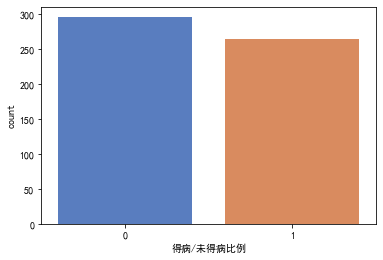

In [122]:
sns.countplot(x='num',data=df,palette="muted")
plt.xlabel("得病/未得病比例")

In [123]:
df.sex.value_counts()

1    419
0    142
Name: sex, dtype: int64

Text(0.5, 0, 'Sex (0 = 女, 1= 男)')

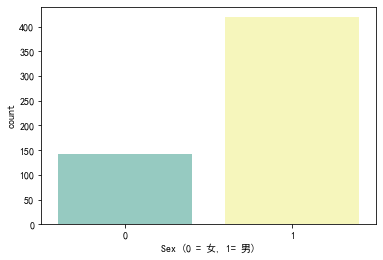

In [124]:
sns.countplot(x='sex',data=df,palette="Set3")
plt.xlabel("Sex (0 = 女, 1= 男)")

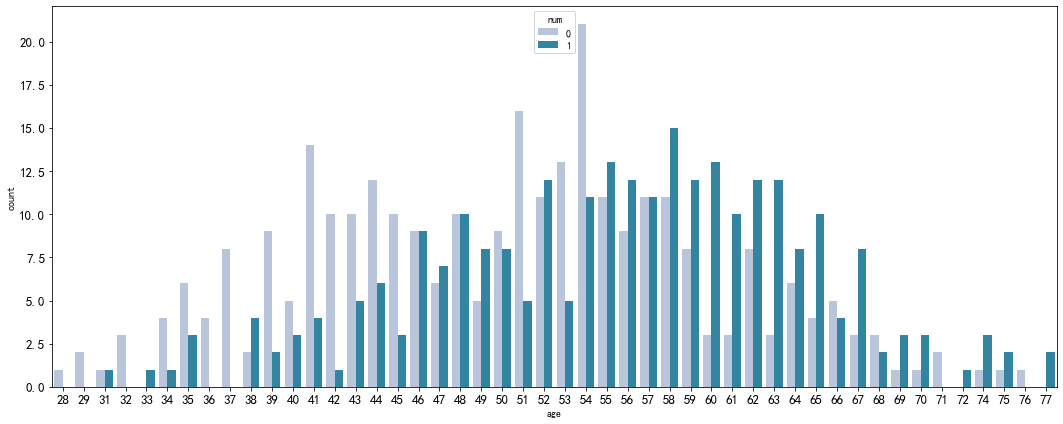

In [125]:
plt.figure(figsize=(18,7))
sns.countplot(x='age',data = df, hue = 'num',palette='PuBuGn',saturation=0.8)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()


In [126]:
first = pd.get_dummies(df['cp'], prefix = "cp")

In [127]:
df = pd.concat([df,first], axis = 1)
df = df.drop(columns = ['cp'])
df.head(3)

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,cp_1,cp_2,cp_3,cp_4
0,62,1,160,254,1,1,108,1,3.0,1,0,0,0,1
1,46,1,140,311,0,0,120,1,1.8,1,0,0,0,1
2,39,0,138,220,0,0,152,0,0.0,0,0,0,1,0


In [128]:
y = df.num.values
X = df.drop(['num'], axis = 1)
X.shape

(561, 13)

In [129]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)
#X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=6)  #随机种子6

In [130]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test) 


In [131]:
param_grid = [
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1,31)]
    },
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(1,31)],
        'p':[i for i in range(1,6)]
    }
]


In [132]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn_clf = KNeighborsClassifier()

grid_search = GridSearchCV(knn_clf,param_grid)

grid_search.fit(X_train,y_train)


C:\Users\52617\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 11.2 s


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30],
                          'p': [1

In [133]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=29, p=2,
                     weights='uniform')

In [134]:
grid_search.best_score_

0.7761904761904762

In [135]:
grid_search.best_params_

{'n_neighbors': 29, 'weights': 'uniform'}

In [136]:
knn_clf = grid_search.best_estimator_
knn_clf.score(X_train,y_train)

0.7976190476190477

In [137]:
knn_clf.score(X_test,y_test)


0.7730496453900709

In [138]:
y_predict_knn = knn_clf.predict(X_test)

In [139]:
from sklearn.metrics import f1_score
f1_score(y_test,y_predict_knn)

0.7714285714285715

In [140]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_knn))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        71
           1       0.77      0.77      0.77        70

    accuracy                           0.77       141
   macro avg       0.77      0.77      0.77       141
weighted avg       0.77      0.77      0.77       141



In [141]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,y_predict_knn)
cnf_matrix


array([[55, 16],
       [16, 54]], dtype=int64)

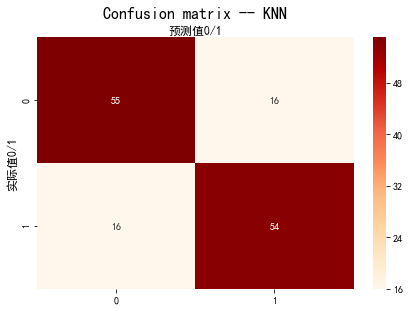

In [142]:
def plot_cnf_matirx(cnf_matrix,description):
    class_names = [0,1]
    fig,ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks,class_names)
    plt.yticks(tick_marks,class_names)

#create a heat map
    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'OrRd',
               fmt = 'g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title(description, y = 1.1,fontsize=16)
    plt.ylabel('实际值0/1',fontsize=12)
    plt.xlabel('预测值0/1',fontsize=12)
    plt.show()
plot_cnf_matirx(cnf_matrix,'Confusion matrix -- KNN')

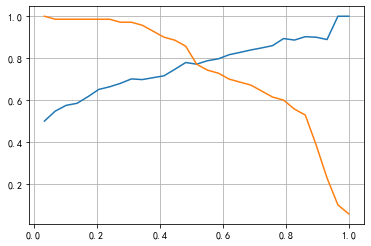

In [143]:
y_probabilities = knn_clf.predict_proba(X_test)[:,1]

from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(y_test,y_probabilities)

plt.plot(thresholds,precisions[:-1])
plt.plot(thresholds,recalls[:-1])
plt.grid()
plt.show()    #没有从最小值开始取,sklearn自己从自己觉得ok的位置开始取


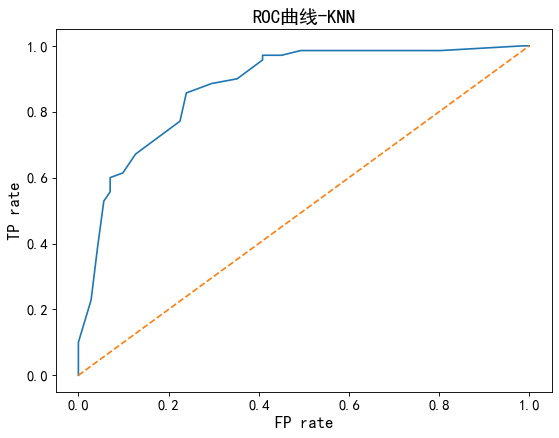

In [147]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
def plot_roc_curve(fprs,tprs):
    plt.figure(figsize=(8,6),dpi=80)
    plt.plot(fprs,tprs)
    plt.plot([0,1],linestyle='--')
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.ylabel('TP rate',fontsize=15)
    plt.xlabel('FP rate',fontsize=15)
    plt.title('ROC曲线-KNN',fontsize=17)
    plt.show()
fprs2,tprs2,thresholds2 = roc_curve(y_test,y_probabilities)
roc_auc_score(y_test,y_probabilities)
plot_roc_curve(fprs2,tprs2)